## SCIE1000/1100 Practical 8 - Semester 2, 2025 #

This practical focusses on the following material: 
- Science and modelling content from Workshop 8.


- Python from throughout the course.


- Communication building further on the principles that have been introduced.

Please review any course material you may have missed prior to the Practical.

**This practical contributes toward your final grade.  Practical grading is explained in the Practical exercises folder on Blackboard**

**Goals**:  This practical focuses on understanding more complex mathematical models. We will make use of our earlier functions (power, cyclic, exponential) and investigate some ways in which they can be combined to model more complex physical phenomena.

The aim of the computing component of this practical is to consolidate your understanding of Python as applied to scientific contexts.
Support for these Python concepts is available: see Appendix A of the course notes, ask on the course discussion board, make use of lecturer office hours, or attend the Python Class.

In the communication component of this practical, we will continue to use the four principles for effective communication.


## Part 1: Warm-up activities (35 minutes) ##


#### Task 1.1: Kahoot time! ####


For each of the following activities, spend two minutes silently forming an answer in your own mind, and then several minutes (maximum of 10 in total) with your group members to define a solution.

**Task 1.2: Communication**

Consider the following paragraph about why air pressure varies with altitude:

*As one ascends from the Earth's surface, atmospheric pressure and density gradually decrease with increasing altitude. This phenomenon is primarily influenced by the decreasing mass of air above a particular location as one moves higher in the atmosphere. The relationship between pressure and altitude is described by the barometric equation, derived from the ideal gas law and an understanding of gravitational and pressure forces acting on the gas at a particular altitude. The temperature lapse rate, indicating how temperature changes with altitude, plays a smaller role in this process. Where temperature decreases with height, the pressure decrease is somewhat less steep than it would be in an isothermal atmosphere.*

1. Who would you think would be a suitable audience for this paragraph?

2. Write down (as dot points) two key messages from the paragraph.



**Task 1.3: Python programming - arrays**

Write a short piece of code to fill an array with 10 elements. The first element is 0 and each successive element is calculated as $E_i = 2 E_{i-1} + 1$.
One way of doing this is to create an array of zeros using np.zeroes(10) and then using a loop to insert each value.
Print the array to check that you have correctly filled each element.

In [1]:
# Creating an array of values

import numpy as np

arr = np.zeros(10)
for i in range(1, len(arr)):
    arr[i] = 2 * arr[i - 1] + 1

print(f"{arr=}")

arr=array([  0.,   1.,   3.,   7.,  15.,  31.,  63., 127., 255., 511.])


## Part 2: Models using combined functions (50 minutes) ##

#### Task 2.1: Combining sine and power ####

In considering the Keeling curve, we investigated combining a sine function with a power function.
Here we will use our plotting skills to create our own plots where a sine function and a power function are combined.

Let's use a simple sine function of the form $y_s = \sin (2\pi t)$ and a simple power function $y_p = x^2$.

The code below plots each function together on a plot.

   1. Make hand sketches of your expectations for (i) $y_s \times y_p$ and (ii) $y_s + y_p$.

   2. Modify the code below to add plots of (i) $y_s \times y_p$ and (ii) $y_s + y_p$.
Do the plots match your expectations?

   3. Try adjusting the following parameters and see what impact they have:

   - the amplitude of the sine wave
   - the equilibrium value of the sine wave
   - the power of the power function

You can experiment further with combining models by visiting the SOMSE [Keeling curve](https://teaching.smp.uq.edu.au/SCIE1000/index.html#topic=modelling-with-functions&lecture=keeling)
and [Surge Function](https://teaching.smp.uq.edu.au/SCIE1000/index.html#topic=modelling-with-functions&lecture=surge) modules.


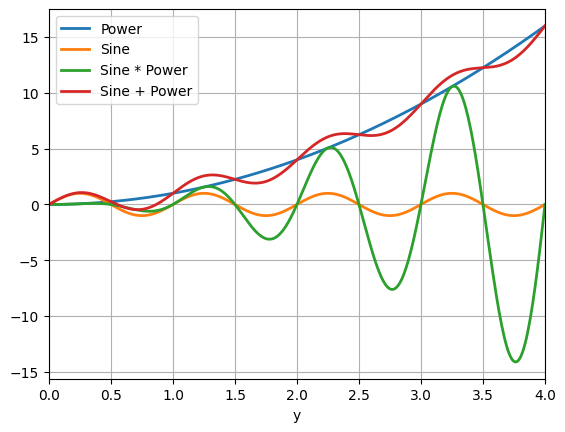

In [3]:
# This program is used show how sine and power functions can be combined
import numpy as np
import matplotlib.pyplot as plt


def mypower(t):
    return t**2


def mysin(y):
    return np.sin(2 * np.pi * t)


# Create equally spaced points and plot functions.
t = np.arange(0.0, 4.01, 0.01)
plt.plot(t, mypower(t), linewidth=2, label="Power")
plt.plot(t, mysin(t), linewidth=2, label="Sine")

plt.plot(t, mysin(t) * mypower(t), linewidth=2, label="Sine * Power")
plt.plot(t, mysin(t) + mypower(t), linewidth=2, label="Sine + Power")

# Create title and label axes. Set axis limits.
plt.xlabel("t")
plt.xlabel("y")
plt.xlim(0, 4)

# Draw a grid, create a legend and display the graph.
plt.grid(True)
plt.legend()
plt.show()

#### Task 2.2:  Wind chill temperatures ####

In cold climates, the apparent temperature to the human body is often called the wind chill temperature. Because wind chill can cause major discomfort, and in cold climates can lead to serious injuries such as frostbite or even death, it is important to measure, model and predict the severity of wind chill.

   1. With your group members, discuss the key parameters that should be included in a model of the wind chill temperature.
   
   2. Develop a simple model based on your expectation of how each parameter would impact the wind chill factor. Include any constants you might need for correct dimensionality.
   
In 2001, the US National Weather Service developed the most widely accepted model. Researchers exposed volunteers to various low temperatures and high wind speeds in a wind tunnel, recording their perceptions of temperatures, along with measurements of the physiological impact of wind chill on their faces. The model that they developed for the wind chill temperature $W$ is


$$W = 13.112 + 0.6215 T - 11.37 v^{0.16} + 0.3965 T v^{0.16}.$$


Here $T$ is the ambient air temperature and $v$ is the wind speed. Both $W$ and $T$ are measured in $^\circ$C while $v$ is measured in km/h. The model is valid only for $v > 5$ km/h.


   3. In what way(s) could this model be conveyed to a member of the general public so that they could do their own wind chill calculation?
   

   4. Use the cell below to write some code to implement the model. You should ask the user (a member of the general public) to input the key parameters and output an answer which appropriately communicates the result.


In [16]:
# A program to calculate apparent wind chill temperatures.


def wind_chill(T, v):
    """
    @param T Temperature in °C
    @param v Wind speed in km/hr
    """
    if v <= 5:
        raise ValueError("This model is only valid for wind speeds above 5 km/hr")
    return 13.112 + 0.6215 * T - 11.37 * v**0.16 + 0.3965 * T * v**0.16


T = float(input("Ambient temperature: "))
v = float(input("Wind speed in km/hr (>5): "))

W = wind_chill(T=T, v=v)

print(f"The wind chill is {W}")

Ambient temperature:  6
Wind speed in km/hr (>5):  6


The wind chill is 4.86498868313217


## Part 3: Merging models (25 minutes) ##

#### Task 3.1: Brisbane temperatures ####

In this question, we will develop a model of temperatures in Brisbane throughout the year.
The following [website](https://www.timeanddate.com/weather/australia/brisbane/hourly) provides hourly predictions for the temperature in Brisbane to inform the modelling.


1. A proposed model for the temperature $T$ (in &deg;C) in Brisbane $t$ *hours* after midnight on a given day in which the average temperature for the day is 20 &deg;C is: 
$$T(t) = 5 \sin\left(\frac{2 \pi}{24}(t-7)\right) + 20$$
Using a few different values for time, confirm that this model seems to be a reasonable.


Now consider the following information about temperatures recorded in Brisbane in 2018:


   >(a) According to a [2018 Seasonal Climate Summary for Greater Brisbane](http://www.bom.gov.au/climate/current/season/qld/archive/201802.brisbane.shtml) provided by the Bureau of Meteorology, the hottest day of the 2017-2018 summer occurred on January 14, 2018, when Brisbane sweltered in 37.5 &deg;C.  
   >(b) According to an article in the [Brisbane Times](https://www.brisbanetimes.com.au/national/queensland/brisbane-wakes-to-coldest-2018-day-records-tumble-across-queensland-20180714-p4zrgy.html), a minimum temperature of 6.7 &deg;C was recorded on July 14, 2018.  
   >(c) On a typical day in Brisbane, the minimum and maximum temperatures differ by 10 &deg;C.  


2. Based on the information described above, the following model was constructed for the *average* temperature $T_{ave}$ (in &deg;C) in Brisbane given the time $t$ in *days* since midnight on January 1, 2018:
$$ T_{ave}(t) = 10.4 \sin\left(\frac{2 \pi}{365}(t-287)\right) + 22.1$$
Again confirm that the model seems reasonable by choosing a few values for time.
You may find this [webpage](https://www.epochconverter.com/days/2018), which gives you the day number of each day of the year in 2018, helpful.


3. Discuss and develop a model for how these functions could be adjusted to calculate the temperature at any time and day of the year (i.e. at a specified hour on a specified day).


4. The cell below contains code that implements each of the above functions and separately calculates the temperatures at the given time of day and time of year.
 Update the code using the model you developed in the previous question part so that a temperature is calculated for the specific inputted time and day.


In [5]:
# Calculate Brisbane temperatures
import numpy as np


def average_temp_hour(t):
    T = 5 * np.sin(2 * np.pi / 24 * (t - 7)) + 20
    return T


def average_temp_day(t):
    T = 10 * np.sin(2 * np.pi / 365 * (t - 287)) + 22.1
    return T


input_hour = int(input("Hour of day to calculate temperature (0-24): "))
T_hour = average_temp_hour(input_hour)
print(
    "On a day with an average temperature of 20 deg C, the temperature at this hour would be ",
    T_hour,
    "deg C.",
)

input_day = int(input("Day of the year to calculate temperature (0-365): "))
T_day = average_temp_day(input_day)
print("The average temperature on this day would be ", T_day, "deg C.")

Hour of day to calculate temperature (0-24):  56


On a day with an average temperature of 20 deg C, the temperature at this hour would be  21.2940952255126 deg C.


Day of the year to calculate temperature (0-365):  32


The average temperature on this day would be  31.583615800121713 deg C.


## Part 4: Further problems ##

These problems are provided for further practice either during or after the practical.

#### Task 4.1:  Cyanide in the blood ####


The code below incorporates data from Lundquist et al. (1987).
The arrays contain the concentration of cyanide in the blood in micromols per litre ($\mu$ mol $\cdot$ L$^{-1}$) after smoking a cigarette,
and time which is measured in minutes.
The code also incorporates a model of how the concentration varies with time.
For this task, note that $\mu$ can be specified in Python print statement using "\u03BC".

1. Run the code in the cell below to create the graph and discuss the type of model that has been used. 


2. The current code is very poorly communicated, both to a reader of the code and to a reader of the output. Together with your classmates, discuss where scientific communication should be improved in the code.  Then edit the code to improve the communication.

Source: Lundquist et al. (1987) Cyanide concentrations in blood after cigarette smoking, as determined by a sensitive
fluorimetric method, Clinical Chemistry, 33:7, 1228 – 1230.


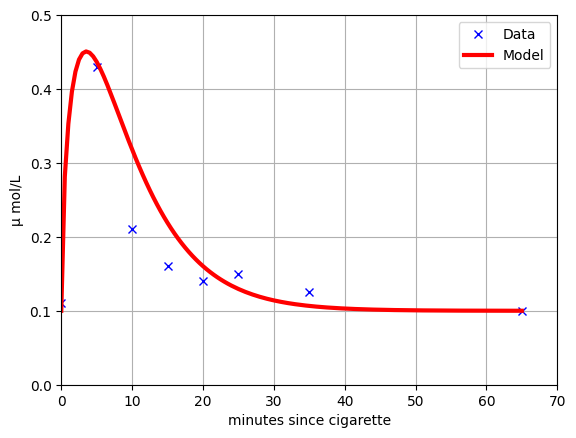

In [12]:
import numpy as np
import matplotlib.pyplot as plt

times = np.array([0, 5, 10, 15, 20, 25, 35, 65])
concs = np.array([0.11, 0.43, 0.21, 0.16, 0.14, 0.15, 0.125, 0.1])

times_fine = np.arange(0.0, 65.1, 0.5)
model = 0.1 + 0.3 * (times_fine**0.6) * np.exp(-0.17 * times_fine)

plt.plot(times, concs, "bx", linewidth=3, label="Data")
plt.plot(times_fine, model, "r-", linewidth=3, label="Model")
plt.xlim(0, 70)
plt.ylim(0, 0.5)
plt.grid(True)
plt.legend(loc="upper right")
plt.xlabel("minutes since cigarette")
plt.ylabel("\u03bc mol/L")
plt.show()

#### Task 4.2 SOMSE Test your skills ####

1. Review the SCIE1000 Online Modules for Support and Enrichment (SOMSE) - in particular, [Test your skills](https://teaching.smp.uq.edu.au/SCIE1000/index.html#topic=modelling-with-functions&lecture=fit). Ask yourself how comfortable are you modelling with these different functions? You can use the "log scale" buttons on the simulation to help you work out what type of model to use.  If you are unsure, review the workshop on exponential functions.



2. Check out the module [Keeling Curve](https://teaching.smp.uq.edu.au/SCIE1000/index.html#topic=modelling-with-functions&lecture=keeling).  Use the simulation to fit a model to the Keeling data. 



3. Check out the module [Surge](https://teaching.smp.uq.edu.au/SCIE1000/index.html#topic=modelling-with-functions&lecture=surge).  Use the simulation to help you get a feel for how the different parameters affect the shape of the curve.
